# Calculer les fréquences d'apparition d'une lettre dans une chaîne de caractères

In [1]:
POS_A = ord('A')#la position du A
POS_a = ord('a')#la position du a
POS_E = ord('E')#la position du E
POS_O = ord('O')#la position du O
POS_U = ord('U')#la position du U
POS_I = ord('I')#la position du U


def pos_char(c):
    '''
    Donne la position du caractère dans l'alphabet
    return -1 si le charactère n'est pas une lettre
    '''
    if 'a' <= c <= 'z':
        p = ord(c) - POS_a
    elif 'A' <= c <= 'Z':
        p = ord(c) - POS_A
    elif c in 'éèêÉÊÊ':
        p = POS_E - POS_A
    elif c in 'ôÔ':
        p = POS_O - POS_A
    elif c in 'ûÛùÙ':
        p = POS_U - POS_A
    elif c in 'îÎ':
        p = POS_I - POS_A
    else:
        p = -1

    return p



def calc_freq(texte):
    Ns_char = [0] * 26 # nombre d'apparitions de chaque lettre
    N = 0 # compte le nombre total de lettres
    for car in texte:
        p = pos_char(car) # donne la position du caractère
        
        # fait des statistiques seuelement sur des caractères alphabétiques
        if p != -1 :
            N = N + 1 # compte le nombre de caractères total du texte
            Ns_char[p] += 1 # compte le nombre de caractères à la postion p
        
    # Normalisation : calcule les fréquences
    freq = [n_char / N for n_char in Ns_char]
    
    return freq

### Test de la fonction

In [2]:
# permet de lire le contenu du fichier texte
livre_fichier = open("Notre-Dame_de_Paris.txt", "r")

In [3]:
# permet de mettre le contenu entier du fichier texte dans une unique chaîne de caractères
texte_livre = livre_fichier.read()
texte_livre = texte_livre.replace('\n', ' ')#remplace les sauts à la ligne "\n" par des espaces " ".

In [4]:
livre_fichier.close()

In [5]:
freq_livre = calc_freq(texte_livre)

In [7]:
# transformer la liste en dictionnaire
dic_freq = {chr(k+POS_A) : freq_livre[k] for k in range(26)}

In [36]:
dic_freq

{'A': 0.07902276012228436,
 'B': 0.01027292184964346,
 'C': 0.0317897458077188,
 'D': 0.0380814021546397,
 'E': 0.17626372218135397,
 'F': 0.011125610097208924,
 'G': 0.01128456498728977,
 'H': 0.010789217190293647,
 'I': 0.07461391828732883,
 'J': 0.004877081046046398,
 'K': 3.080521125597775e-05,
 'L': 0.060917921362921124,
 'M': 0.027305739257298678,
 'N': 0.06426706393067103,
 'O': 0.05290240539411571,
 'P': 0.02695702426588101,
 'Q': 0.01212862777570356,
 'R': 0.06601926434691104,
 'S': 0.07616033989237891,
 'T': 0.07307488993298018,
 'U': 0.06670560445369422,
 'V': 0.016692727875389224,
 'W': 3.6966253507173303e-06,
 'X': 0.00401576733932926,
 'Y': 0.003043554872090602,
 'Z': 0.0016536237402208858}

In [68]:
freq_triees = sorted([(key, value) for key, value in dic_freq.items()],
                      key=lambda x: x[1],
                      reverse = True)
freq_triees 

[('E', 0.17626372218135397),
 ('A', 0.07902276012228436),
 ('S', 0.07616033989237891),
 ('I', 0.07461391828732883),
 ('T', 0.07307488993298018),
 ('U', 0.06670560445369422),
 ('R', 0.06601926434691104),
 ('N', 0.06426706393067103),
 ('L', 0.060917921362921124),
 ('O', 0.05290240539411571),
 ('D', 0.0380814021546397),
 ('C', 0.0317897458077188),
 ('M', 0.027305739257298678),
 ('P', 0.02695702426588101),
 ('V', 0.016692727875389224),
 ('Q', 0.01212862777570356),
 ('G', 0.01128456498728977),
 ('F', 0.011125610097208924),
 ('H', 0.010789217190293647),
 ('B', 0.01027292184964346),
 ('J', 0.004877081046046398),
 ('X', 0.00401576733932926),
 ('Y', 0.003043554872090602),
 ('Z', 0.0016536237402208858),
 ('K', 3.080521125597775e-05),
 ('W', 3.6966253507173303e-06)]

### Histogramme des lettres

In [9]:
from matplotlib.pyplot import bar,show,xticks

In [10]:
def create_histo(dico):
    xticks(rotation = 'vertical')
    bar(list(dico.keys()), dico.values(), color='g')
    show()

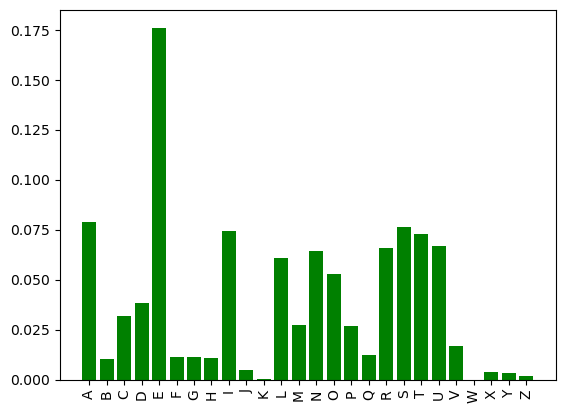

In [11]:
create_histo(dic_freq)

## Cryptanalyse Cesar

In [27]:
def dist_freq(freq1, freq2):
    ''' calcule la distance euclidienne ||f1-f2||
    '''
    dist = 0
    for k in range(len(freq1)):
        dist += (freq1[k] - freq2[k])**2
    
    return dist**0.5

In [22]:
def cesar_dechiffre(texte_chiffre, k):
    texte_clair= ""
    for lettre in texte_chiffre:
        nb_chiffre = pos_char(lettre)
        nb_clair = (nb_chiffre - k) % 26
        lettre_clair = chr(nb_clair + POS_A)
        texte_clair = texte_clair + lettre_clair
    return texte_clair

In [31]:
def casser_cesar(texte_chiffre):
    
    d_min = 2 # car ||a-b||=(a-b)·(a-b)=||a||+||b||-2 (a·b)=2-2 (a·b)
              # donc toujours plus petit que 2
    cle = 0
    texte_dechiffre_final = texte_chiffre
    for k in range(1,26):
        texte_dechiffre = cesar_dechiffre(texte_chiffre, k)
        freq_dechiffre =  calc_freq(texte_dechiffre)
        d = dist_freq(freq_dechiffre, freq_livre)
        
        if d < d_min:
            d_min = d
            cle = k
            texte_dechiffre_final = texte_dechiffre
            
    return cle, texte_dechiffre_final

In [32]:
texte_chiffre_01='INKANNWLJPN'
cle, texte_dechiffre = casser_cesar(texte_chiffre_01)
print('La clé pour déchiffrer "', texte_chiffre_01, '" est ', cle, 
      ' et le texte dechiffré est : ', texte_dechiffre)

La clé pour déchiffrer " INKANNWLJPN " est  9  et le texte dechiffré est :  ZEBREENCAGE


In [34]:
texte_chiffre_02='LKDKSVVO'
cle, texte_dechiffre = casser_cesar(texte_chiffre_02)
print('La clé pour déchiffrer "', texte_chiffre_02, '" est ', cle, 
      ' et le texte dechiffré est : ', texte_dechiffre)

La clé pour déchiffrer " LKDKSVVO " est  10  et le texte dechiffré est :  BATAILLE


In [35]:
texte_chiffre_03='REYPKENA'
cle, texte_dechiffre = casser_cesar(texte_chiffre_03)
print('La clé pour déchiffrer "', texte_chiffre_03, '" est ', cle, 
      ' et le texte dechiffré est : ', texte_dechiffre)

La clé pour déchiffrer " REYPKENA " est  22  et le texte dechiffré est :  VICTOIRE


## Cryptanalyse Affine

In [38]:
def find_inverse_Z26(x):
    '''
      Si l'inverse n'existe pas, 0 est retourné
    '''
    for k in range(1,26):
        r = (x * k) % 26
        if r == 1:
            return k
    return 0

In [43]:
def affine_dechiffre(texte_chiffre,a,b):
    
    inverse = find_inverse_Z26(a)     # c est l'inverse de a mod 26
            
    texte_clair= ""
    for lettre in texte_chiffre:               # Boucle
        nb_chiffre = pos_char(lettre)              # Bijection b
        nb_clair = inverse*(nb_chiffre-b)%26      # Fonction de dechiffrement
        lettre_clair = chr(nb_clair + POS_A)          # Bijection b^-1
        texte_clair = texte_clair + lettre_clair   
    return texte_clair

In [44]:
affine_dechiffre('LCRCWXXM',9,2)

'BATAILLE'

In [47]:
# tous les éléments qui possède une inverse dans Z26
INV_Z26 = [find_inverse_Z26(k) for k in range(26) if find_inverse_Z26(k)!=0]
INV_Z26

[1, 9, 21, 15, 3, 19, 7, 23, 11, 5, 17, 25]

In [60]:
def casser_affine(texte_chiffre):
    
    d_min = 2 # car ||a-b||=(a-b)·(a-b)=||a||+||b||-2 (a·b)=2-2 (a·b)
              # donc toujours plus petit que 2
    cle = (1,0)
    texte_dechiffre_final = texte_chiffre
    for a in INV_Z26:
        for b in range(1,26):
            texte_dechiffre = affine_dechiffre(texte_chiffre, a,b)
            freq_dechiffre =  calc_freq(texte_dechiffre)
            d = dist_freq(freq_dechiffre, freq_livre)
            
            if d < d_min:
                d_min = d
                cle = (a,b)
                texte_dechiffre_final = texte_dechiffre
                # print((a,b), texte_dechiffre, d)
            
    return cle, texte_dechiffre_final

In [61]:
casser_affine('LCRCWXXM')

((11, 10), 'TEDEUNNM')

In [62]:
casser_affine('OIDABZVQVTEMDTGDZNUV')

((11, 3), 'BRAVOCENESTPASFACILE')

In [69]:
casser_affine('CJLZBBNAKJBJAUBFCFUNFWJJVUYWJU')

((25, 13), 'LECOMMANDEMENTMILITAIREESTPRET')